In [1]:
#Heart Disease Prediction using Machine Learning.

In [2]:
#Importing Essential Libraries.

#Numpy and Pandas for data manipulation.
import numpy as np
import pandas as pd

#Matplotlib and Seaborn for data visualization.
import matplotlib.pyplot as plt
import seaborn as sns

#Sklearn modules for Machine Learning.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#To ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Loading the heart disease dataset from CSV.
df = pd.read_csv("heart_disease_uci.csv")

#Displaying first five rows.
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
#Displaying the last five rows.
df.tail()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


In [5]:
#Checking the column names, null values and datatypes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [6]:
#Displaying the count, mean, min, max, standard deviation, and quartiles.
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [7]:
#Checking the missing values in each column.
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [8]:
#Dropping a few columns.
df = df.drop(["slope", "ca", "thal"], axis=1)

In [9]:
#Converting num to 0 or 1.
#0= no heart disease, 1= heart disease.

df["num"] = df["num"].apply(lambda x: 1 if x > 0 else 0)

In [10]:
#Filling the numerical columns with median values.
num_cols = ["trestbps", "chol", "thalch", "oldpeak"]
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

In [11]:
#Filling the categorical columns with mode.
cat_cols = ["sex", "dataset", "cp", "fbs", "restecg", "exang"]
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [12]:
#Dropping the ID in columns.
if "id" in df.columns:
    df=df.drop("id", axis=1)

In [13]:
#One-Hot Encoding.
#Converting categorical columns to dummy variables.
df = pd.get_dummies(df, drop_first=True)

In [14]:
#Dataset columns and datatypes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       920 non-null    int64  
 1   trestbps                  920 non-null    float64
 2   chol                      920 non-null    float64
 3   fbs                       920 non-null    bool   
 4   thalch                    920 non-null    float64
 5   exang                     920 non-null    bool   
 6   oldpeak                   920 non-null    float64
 7   num                       920 non-null    int64  
 8   sex_Male                  920 non-null    bool   
 9   dataset_Hungary           920 non-null    bool   
 10  dataset_Switzerland       920 non-null    bool   
 11  dataset_VA Long Beach     920 non-null    bool   
 12  cp_atypical angina        920 non-null    bool   
 13  cp_non-anginal            920 non-null    bool   
 14  cp_typical

In [15]:
#Displaying the first five rows after dropping ID.
df.head()

,age,trestbps,chol,fbs,thalch,exang,oldpeak,num,sex_Male,dataset_Hungary,dataset_Switzerland,dataset_VA Long Beach,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality
0,63,145.0,233.0,True,150.0,False,2.3,0,True,False,False,False,False,False,True,False,False
1,67,160.0,286.0,False,108.0,True,1.5,1,True,False,False,False,False,False,False,False,False
2,67,120.0,229.0,False,129.0,True,2.6,1,True,False,False,False,False,False,False,False,False
3,37,130.0,250.0,False,187.0,False,3.5,0,True,False,False,False,False,True,False,True,False
4,41,130.0,204.0,False,172.0,False,1.4,0,False,False,False,False,True,False,False,False,False


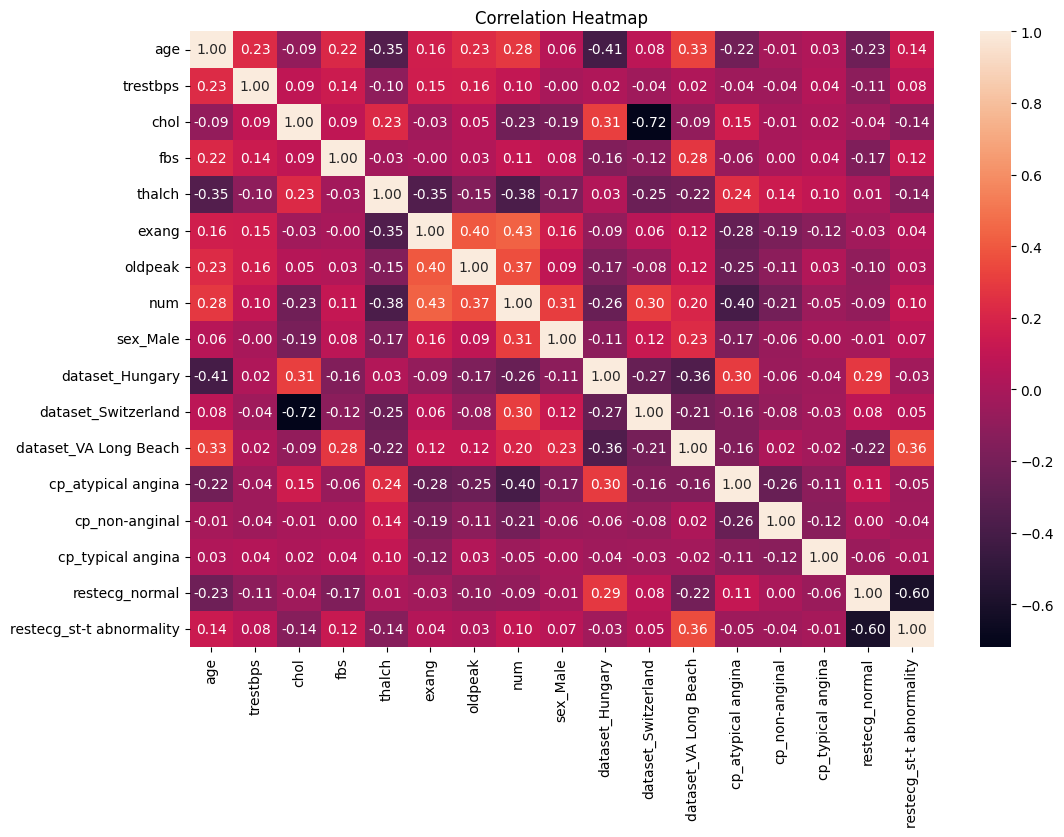

In [16]:
#Plotting a correlation heatmap.

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [17]:
#Separating features (X) and target (y).
X = df.drop("num", axis=1)
y = df["num"]

In [18]:
# Splitting the dataset into training and test sets.
#80% for training, 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Standardizing features for models like Logistic Regression, KNN, SVM, etc. 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
#Logistic Regression.
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

y_pred_lr = log_reg.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8043478260869565
              precision    recall  f1-score   support

           0       0.74      0.80      0.77        75
           1       0.85      0.81      0.83       109

    accuracy                           0.80       184
   macro avg       0.80      0.80      0.80       184
weighted avg       0.81      0.80      0.81       184



In [21]:
#K-Nearest Neighbors.
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.8206521739130435
              precision    recall  f1-score   support

           0       0.74      0.87      0.80        75
           1       0.90      0.79      0.84       109

    accuracy                           0.82       184
   macro avg       0.82      0.83      0.82       184
weighted avg       0.83      0.82      0.82       184



In [22]:
#Support Vector Classifier.
svm = SVC(probability=True)
svm.fit(X_train_scaled, y_train)

y_pred_svm = svm.predict(X_test_scaled)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.8478260869565217
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        75
           1       0.89      0.84      0.87       109

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.85      0.85       184



In [23]:
#Decision Tree Classifier.
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.66      0.79      0.72        75
           1       0.83      0.72      0.77       109

    accuracy                           0.75       184
   macro avg       0.75      0.76      0.75       184
weighted avg       0.76      0.75      0.75       184



In [24]:
#Random Forest Classifier.
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8260869565217391
              precision    recall  f1-score   support

           0       0.77      0.83      0.79        75
           1       0.87      0.83      0.85       109

    accuracy                           0.83       184
   macro avg       0.82      0.83      0.82       184
weighted avg       0.83      0.83      0.83       184



In [25]:
#Displaying all the models accuracy.
model_scores =["Logistic Regression", "KNN", "SVM", "Decision Tree", "Random Forest"]
accuracies = [accuracy_score(y_test, y_pred_lr),
              accuracy_score(y_test, y_pred_knn),
              accuracy_score(y_test, y_pred_svm),
              accuracy_score(y_test, y_pred_dt),
              accuracy_score(y_test, y_pred_rf)]
comparison_df = pd.DataFrame({ "Model": model_scores, "Accuracy": accuracies})
print("Model Accurary Comparison:")
display(comparison_df)

Model Accurary Comparison:


,Model,Accuracy
0,Logistic Regression,0.804348
1,KNN,0.820652
2,SVM,0.847826
3,Decision Tree,0.750000
4,Random Forest,0.826087


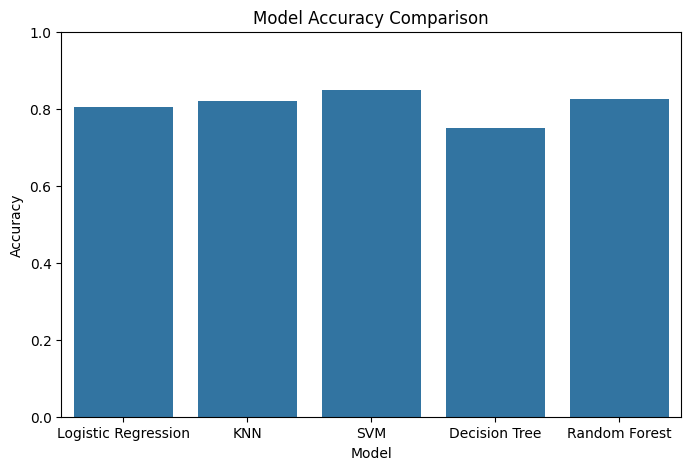

In [26]:
#Barchart for comparing the model accuracies.
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="Accuracy", data=comparison_df)
plt.title("Model Accuracy Comparison")
plt.ylim(0,1)
plt.show()

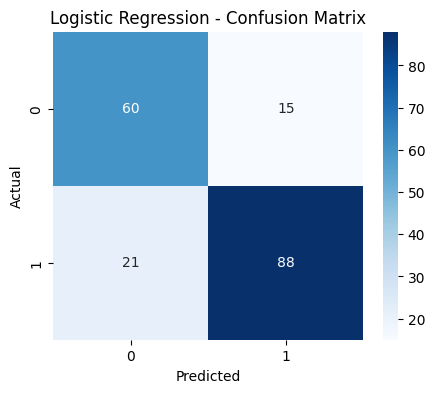

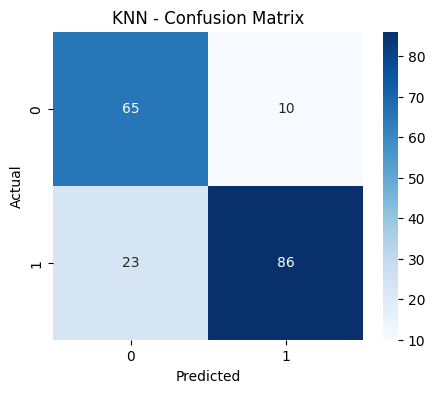

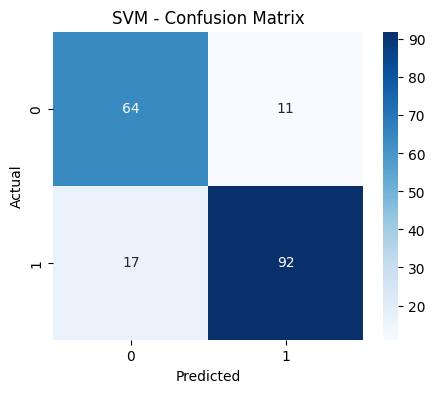

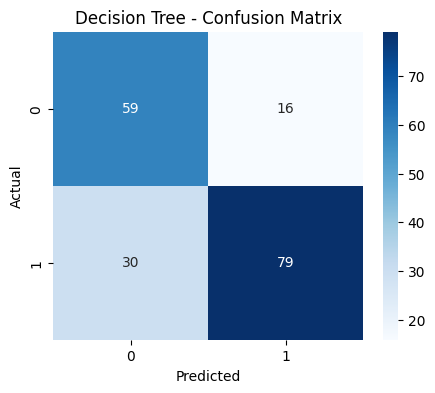

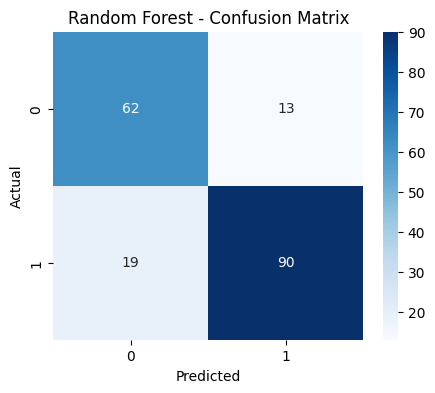

In [27]:
#Confusion Matrix for all the models.

def plot_cm(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_cm("Logistic Regression", y_test, y_pred_lr)
plot_cm("KNN", y_test, y_pred_knn)
plot_cm("SVM", y_test, y_pred_svm)
plot_cm("Decision Tree", y_test, y_pred_dt)
plot_cm("Random Forest", y_test, y_pred_rf)

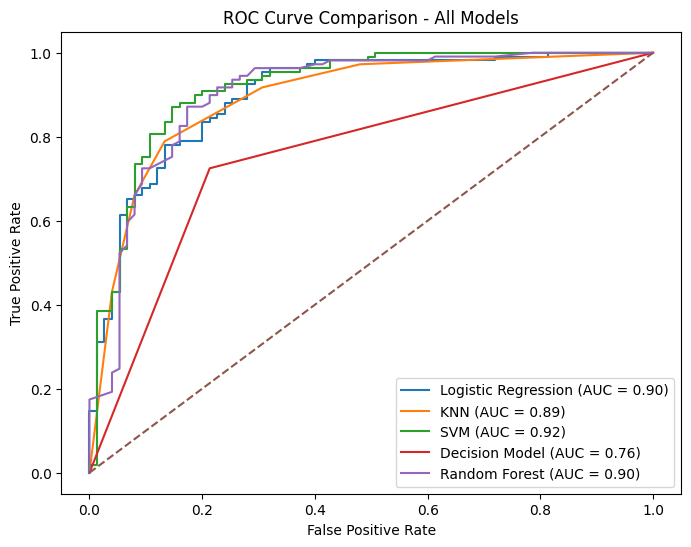

In [28]:
#ROC Curve for all models.
plt.figure(figsize=(8,6))

for model_name, model, X_data in zip(["Logistic Regression", "KNN", "SVM", "Decision Model", "Random Forest"],
                                     [log_reg, knn, svm, dt, rf],
                                     [X_test_scaled, X_test_scaled, X_test_scaled, X_test, X_test]):
    y_prob = model.predict_proba(X_data)[:,1] 
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

#Diagonal Line for Random Guessing.
plt.plot([0,1], [0,1],"--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison - All Models")
plt.legend()
plt.show()

In [29]:
#MSelecting the final model.
#I selected Support Vector Machine as my final model because of its highest accuracy and ROC-AUC.

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Final SVM Accuracy: {svm_accuracy:.3f}")

Final SVM Accuracy: 0.859


In [30]:
#I could see minor variations in the accuracy due to data splitting and model configuration.
#SVM achieved approximately 86% accuracy.

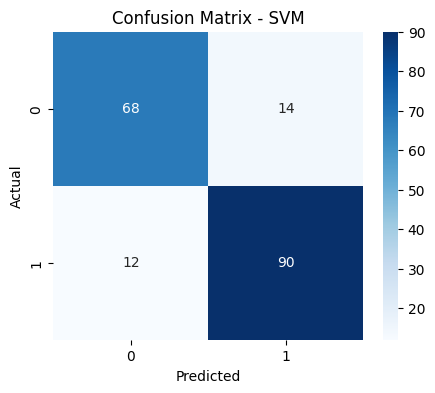

In [31]:
#Confusion Matrix for SVM.

cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

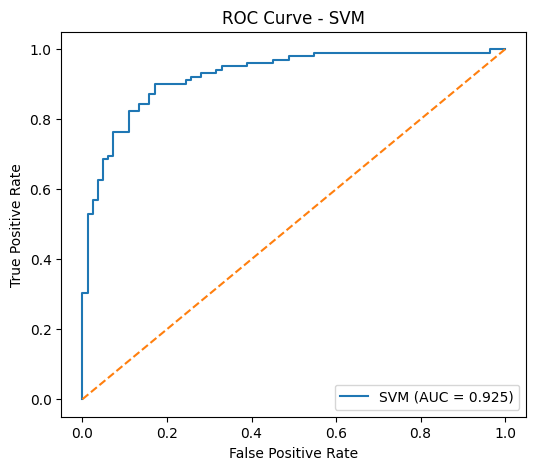

In [32]:
#ROC Curve for SVM.
y_prob_svm = svm_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_svm)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"SVM (AUC = {roc_auc:.3})")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend()
plt.show()

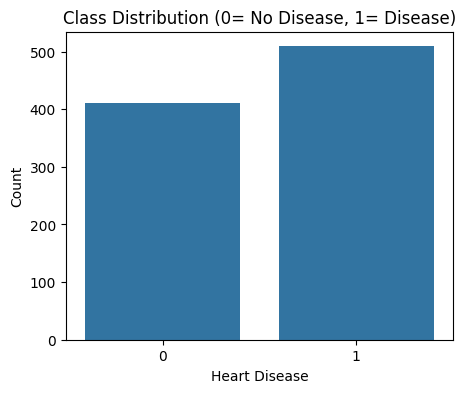

In [33]:
#Countplot to visualize the class distribution.
plt.figure(figsize=(5,4))
sns.countplot(x='num', data=df)
plt.title("Class Distribution (0= No Disease, 1= Disease)")
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.show()

In [34]:
#Identifying the top correlated features for Heart Disease.
corr_target = df.corr()['num'].abs().sort_values(ascending=False)

top_features = corr_target.index[1:6]
print("Top 5 correlated features:")
print(top_features)

Top 5 correlated features:
Index(['exang', 'cp_atypical angina', 'thalch', 'oldpeak', 'sex_Male'], dtype='object')


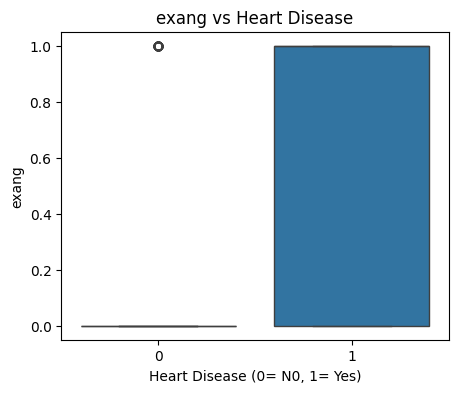

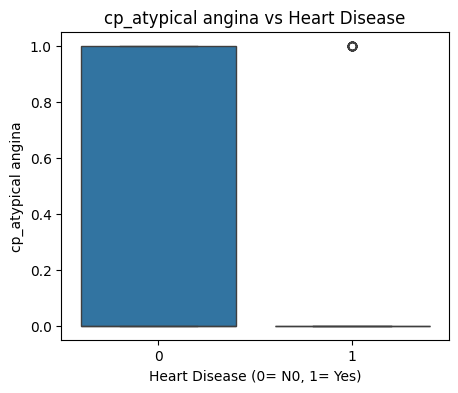

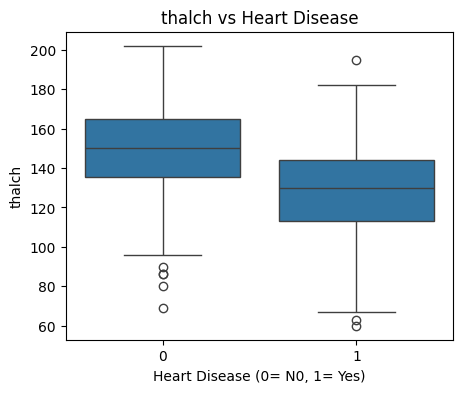

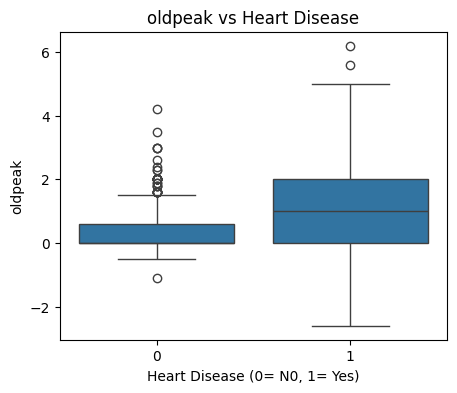

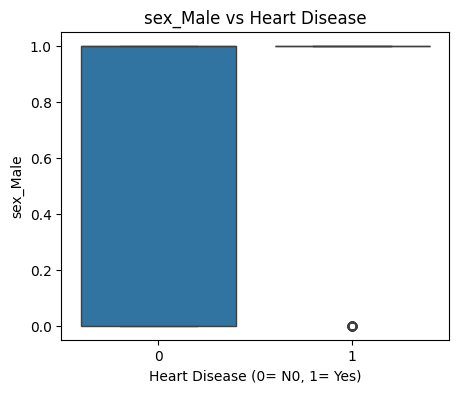

In [35]:
#Visualizing the top features.
for feature in top_features:
    plt.figure(figsize=(5,4))
    sns.boxplot(x='num', y=feature, data=df)
    plt.title(f"{feature} vs Heart Disease")
    plt.xlabel("Heart Disease (0= N0, 1= Yes)")
    plt.show()

In [36]:
#Summary of the project.

print("FINAL RESULTS:")
print("Best model: Support Vector Machine(SVM)")
print(f"Final Test Accuracy: {svm_accuracy:.3f}")

FINAL RESULTS:
Best model: Support Vector Machine(SVM)
Final Test Accuracy: 0.859


In [37]:
#CONCLUSION

#I trained multiple models like Logistic Regression, KNeighbors Classifier, Support Vector Machines, Decision trees, and Random Forest Model.
#Support Vector Machines(SVM) performed the best among all other models with 86% accuracy.

#Feature Analysis helped me identify the top 5 clinical variables that were influencing heart disease prediction.
#They are: 

# 1. Exang - exercise-induced angina
# 2. cp_atypical_agina - Chest Pain
# 3. thalch - Maximum heart rate
# 4. oldpeak - ST depression induced by exercise 
# 5. sex_Male - Gender.

#This project strengthened my skills in data cleaning, preprocessing, model selection and evaluation, feature analysis, and storytelling.